# Advanced clustering on real-world data
## TD2 (part II): K-means and Hierarchical clustering


Clustering is an unsupervised machine learning technique (= classes not known) used to group data points together based on similarities.
___

For this practical, you will work in groups of 2 or 3. **You first have to choose a real-world dataset that interests you. After showing this dataset to your teacher, you will use it in this notebook and for the next practicals.**

The goal of this example is to compare different clustering methods: K-means clustering, which you used in the previous practical, and hierarchical clustering, today's topic.
We will apply both algorithms, and compare their results to see if one is more appropriate than the other on our dataset.

During the next practical session, we will apply one last clustering algorithm: Spectral clustering.

For the purposes of this practical and the following sessions, please choose a dataset that fits the following criteria:
* At least 10 features.
* There are classes associated to samples.
* Ideally, the dataset should have missing data and contain a mix of nominal and numeric features.

**Note that each group will work on a different dataset. Before continuing on with the practical, make sure your dataset fits the criteria, and present it to your teacher for approval.**

Resources to find a dataset:
* https://www.data.gouv.fr/fr/pages/donnees-machine-learning/ (-> look at the datasets in "Classification"). Descriptions in French.
* https://www.kaggle.com/datasets
* https://www.projectpro.io/article/100-machine-learning-datasets-curated-for-you/407#mcetoc_1fb93e44vj : curated list of links to datasets, sorted by theme.


**Once your dataset has been approved, please fill in this spreadsheet: https://docs.google.com/spreadsheets/d/1neQD4Cmj2DWu5-rLbsBM-DB_sLvePbqXWNmJVE1SWBY/edit?usp=sharing.**

**DATASET DESCRIPTION**:


The Titanic dataset is a popular dataset used in machine learning and data science. It contains information about the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. The dataset is often used for predicting survival rates of the passengers based on various characteristics such as age, gender, and class.

The dataset contains the following information for each passenger:

**PassengerID**: a unique identifier for each passenger

**Survived**: whether the passenger survived or not (0 = did not survive, 1 = survived)

**Pclass:** the passenger's class (1 = first class, 2 = second class, 3 = third class)

**Name:** the passenger's name

**Sex: **the passenger's gender

**Age:** the passenger's age (in years)

**SibSp:** the number of siblings or spouses the passenger had aboard the Titanic

**Parch:** the number of parents or children the passenger had aboard the Titanic

**Ticket:** the passenger's ticket number

**Fare:** the fare the passenger paid for their ticket

**Cabin:** the cabin number where the passenger stayed

**Embarked:** the port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

The dataset contains 891 entries, with some missing values in the "Age", "Cabin", and "Embarked" columns. The "Survived" column is the target variable that we want to predict based on the other variables in the dataset.


### Package import

**Tip**: look at the documentation of the packages and methods imported, they can help you answer some questions.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Load the dataset, separate data from classes

In [79]:
df = pd.read_csv('titanic.csv', header=0)

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data preprocessing

Visualize the 10 first rows of both data and classes

In [81]:
print(df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

Are there any missing values (in data)? What type are the variables?

In [82]:
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Based on the output we provided, we can see that the "Age" variable has 177 missing values, the "Cabin" variable has 687 missing values, and the "Embarked" variable has 2 missing values.

*"Age" is likely a numerical variable indicating the age of each passenger, and it's likely a floating-point number or an integer.

*"Cabin" is likely a string variable indicating the cabin number of each passenger.

*"Embarked" is likely a categorical variable indicating the port of embarkation of each passenger, and it's likely an integer.

Use the describe method and explain what you obtain. (If your dataset has >20 features, only use describe on the first 20 features).

In [83]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


If your dataset contains missing data, follow the process seen in the first practical to impute missing data. Make sure to impute numeric and nominal data with different strategies.

In [84]:
# Separate the labels from the variables
true_labels = df["Survived"]
psid= df.pop("PassengerId")
features = df.drop("Survived", axis=1)

In [85]:
from sklearn.impute import SimpleImputer 

# Step 1: separate the numerical and nominal attributes
numerical_attributes = features.select_dtypes(include=['float64', 'int64'])
nominal_attributes = df[['Name', 'Sex', 'Cabin']]

Explain your choice of imputation strategy for each data type.

In [86]:
# Step 2: Replace missing values of numerical dataset with a median (or means, zeros, etc.)
#numerical_attributes = df.select_dtypes(include=['float64', 'int64']).copy()
#numerical_attributes.fillna(numerical_attributes.median(), inplace=True)
imputer = SimpleImputer(strategy='median')
# Step 2.a: fit the imputer instance to the data
imputer.fit(numerical_attributes)
# Step 2.b: Transform the dataset by replacing the missing values
# Replace missing values with the median
numerical_attributes_imputed = imputer.transform(numerical_attributes)

In [87]:
numerical_attributes_imputed = pd.DataFrame(numerical_attributes_imputed, columns=numerical_attributes.columns)
numerical_attributes_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    float64
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    float64
 3   Parch   891 non-null    float64
 4   Fare    891 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


In [88]:
# Step 1: Use the pandas function factorize() to transform the nominal dataset 
nominal_attributes_factorized = nominal_attributes.apply(lambda x: pd.factorize(x)[0])
#print(nominal_attributes_factorized)

In [89]:
# Step 2: Replace missing nominal values by the most frequent ones 
imputer = SimpleImputer(strategy="most_frequent", missing_values = -1)

# Step 2.a: fit the imputer instance to the data 
imputer.fit(nominal_attributes_factorized)
# Step 2.b: transform the dataset by replacing the missing values by the most frequent values
nominal_attributes_imputed = imputer.transform(nominal_attributes_factorized)

In [90]:
nominal_attributes_imputed = pd.DataFrame(nominal_attributes_imputed, columns=nominal_attributes_factorized.columns)

In [91]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Merge the numerical and categorical datasets to get the complete preprocessed dataset in a single dataframe.**

In [92]:
preprocessed_data = pd.concat([numerical_attributes_imputed,nominal_attributes_imputed], axis=1)
print(preprocessed_data)

     Pclass   Age  SibSp  Parch     Fare  Name  Sex  Cabin
0       3.0  22.0    1.0    0.0   7.2500     0    0      3
1       1.0  38.0    1.0    0.0  71.2833     1    1      0
2       3.0  26.0    0.0    0.0   7.9250     2    1      3
3       1.0  35.0    1.0    0.0  53.1000     3    1      1
4       3.0  35.0    0.0    0.0   8.0500     4    0      3
..      ...   ...    ...    ...      ...   ...  ...    ...
886     2.0  27.0    0.0    0.0  13.0000   886    0      3
887     1.0  19.0    0.0    0.0  30.0000   887    1    145
888     3.0  28.0    1.0    2.0  23.4500   888    1      3
889     1.0  26.0    0.0    0.0  30.0000   889    0    146
890     3.0  32.0    0.0    0.0   7.7500   890    0      3

[891 rows x 8 columns]


In [93]:

print(preprocessed_data.isna().sum())

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
Name      0
Sex       0
Cabin     0
dtype: int64


In [94]:
imputer = SimpleImputer(strategy='median')
# Step 2.a: fit the imputer instance to the data
imputer.fit(preprocessed_data)
# Step 2.b: Transform the dataset by replacing the missing values
# Replace missing values with the median
preprocessed_data_attributes_imputed = imputer.transform(preprocessed_data)

In [95]:
preprocessed_data_attributes_imputed = pd.DataFrame(preprocessed_data, columns=preprocessed_data.columns)
#preprocessed_data_attributes_imputed.info()
print (preprocessed_data_attributes_imputed)

     Pclass   Age  SibSp  Parch     Fare  Name  Sex  Cabin
0       3.0  22.0    1.0    0.0   7.2500     0    0      3
1       1.0  38.0    1.0    0.0  71.2833     1    1      0
2       3.0  26.0    0.0    0.0   7.9250     2    1      3
3       1.0  35.0    1.0    0.0  53.1000     3    1      1
4       3.0  35.0    0.0    0.0   8.0500     4    0      3
..      ...   ...    ...    ...      ...   ...  ...    ...
886     2.0  27.0    0.0    0.0  13.0000   886    0      3
887     1.0  19.0    0.0    0.0  30.0000   887    1    145
888     3.0  28.0    1.0    2.0  23.4500   888    1      3
889     1.0  26.0    0.0    0.0  30.0000   889    0    146
890     3.0  32.0    0.0    0.0   7.7500   890    0      3

[891 rows x 8 columns]


In [96]:
#We  have two results from Jupiter and Colab, and to avoid having null values, We used the SimpleImputer method twice.

Do you think the data should be scaled? If yes, do it and compare the obtained data to the original data (compare only the first 20 features if the dataset is large). 

in general, scaling the data can be beneficial for many machine learning algorithms as it can improve their performance and make them more accurate. 

For our dataset ( Titanic dataset), which is a relatively small dataset, scaling might not be as necessary as it would be for larger datasets. 

But to scale the data, we can use the StandardScaler from the sklearn.preprocessing module.

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(preprocessed_data_attributes_imputed)

In [98]:
preprocessed_data_attributes_imputed_scaled = pd.DataFrame(X_scaled, columns=preprocessed_data.columns)


How many classes are there? Plot the distribution of the classes. Is the data balanced or imbalanced? 

In [99]:
# Count the number of occurrences of each class in the Survived variable
class_counts = true_labels.value_counts()
#class_counts = preprocessed_data_attributes_imputed.groupby('Survived').size()

# Print the counts
print(class_counts)

0    549
1    342
Name: Survived, dtype: int64


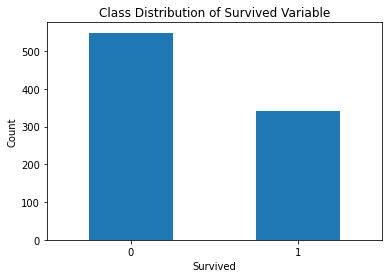

In [100]:

# Create a bar plot of the class distribution
class_counts.plot(kind='bar')
plt.title('Class Distribution of Survived Variable')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

To determine whether our dataset(the Titanic dataset) is balanced or imbalanced, we can look at the distribution of the classes in the 'Survived' variable. As we saw earlier, there are two classes in the 'Survived' variable: 0 (did not survive) and 1 (survived). The number of instances of each class are:

Class 0 (did not survive): 549
Class 1 (survived): 342
From this, we can see that there are more instances of class 0 (did not survive) than class 1 (survived). However, to determine whether the dataset is balanced or imbalanced, we need to look at the ratio of the number of instances of each class.

The ratio of the number of instances of class 0 to class 1 is:

This tells us that there are about 1.605263157894737 times as many instances of class 0 (did not survive) as there are instances of class 1 (survived).

Based on this ratio, we could say that the Titanic dataset is slightly imbalanced towards class 0. 

In [101]:
549/ 342

1.605263157894737

Encode your classes into a numerical variable.

In this code, we first create a LabelEncoder object and use it to encode the 'Survived' variable into a numerical variable. The fit_transform() method of the LabelEncoder class fits the encoder to the 'Survived' variable and then transforms the classes into numerical values.

Finally, we print the first 5 rows of the 'Survived' variable to verify that the encoding was successful. The output should show that the classes have been encoded as either 0 or 1.

In [102]:
# Create a LabelEncoder object
#le = LabelEncoder()

# Encode the 'Survived' variable

#true_labels= le.fit_transform(true_labels)
#true_labels = pd.DataFrame(true_labels, columns = ['Survived'])
# Print the first 5 rows of the 'Survived' variable to verify the encoding
#print(labels.head())
true_labels.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Check if your data and classes are numpy arrays. If that is not the case, transform your data and classes into numpy arrays. 

In [103]:
# Convert the data and classes to numpy arrays
X = np.array(preprocessed_data_attributes_imputed_scaled)
y = np.array(true_labels)

# Check if X and y are numpy arrays
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Clustering algorithm 1: K-means

Apply the K-means algorithm with 2 centers. Look at the default parameters the method takes. Make sure the algorithm doesn't run more than 500 iterations.

In [104]:
# Create a KMeans object with 2 centers
kmeans = KMeans(n_clusters=2,max_iter=500)
# Fit the KMeans object to the data
kmeans.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=500, n_clusters=2)

In [105]:
# Get the labels for the data
predicted_labels = kmeans.labels_

# Print the labels
#print(labels)





What does the max_iter parameter do? 

In [106]:
#In the K-means algorithm, the max_iter parameter specifies the maximum 
#number of iterations that the algorithm will perform to converge to a solution.

How many samples are in each cluster? 

In [107]:
import numpy as np

# Count the number of samples in each cluster
unique, counts = np.unique(predicted_labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 203, 1: 688}


In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers. 
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center. 
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br> 

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3232068515668429


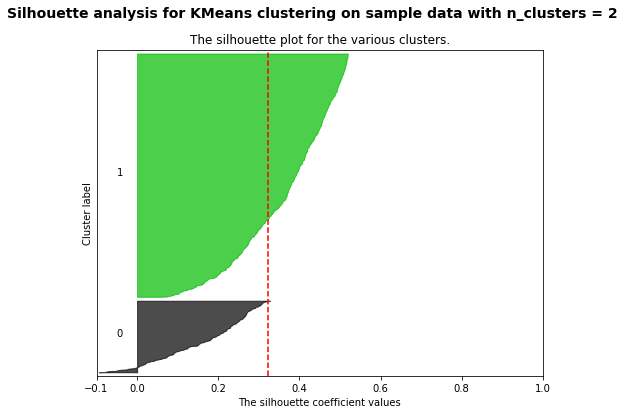

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3162000255873202


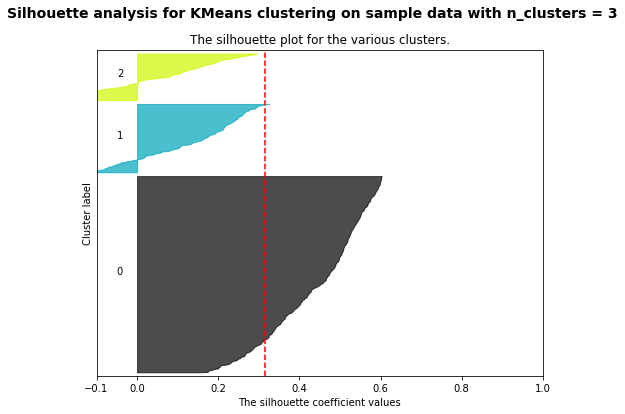

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.26140799968603307


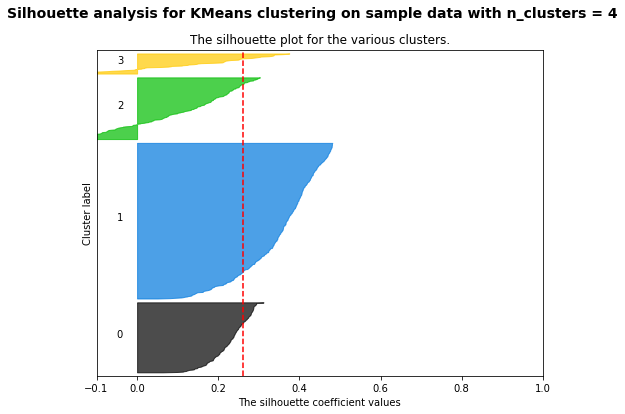

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.27381974152699917


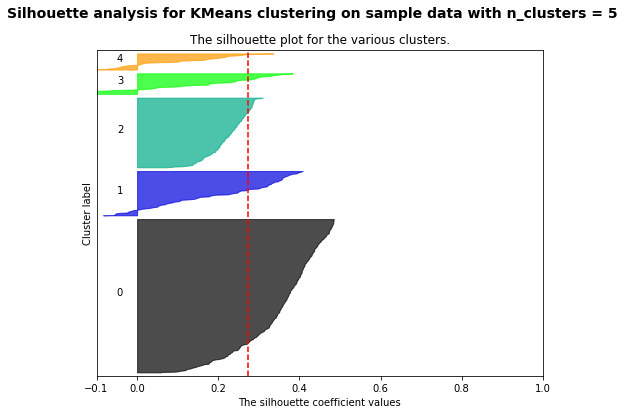

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2712119000108802


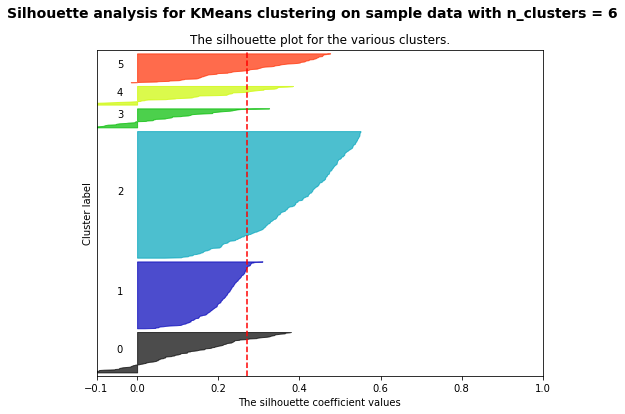

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.2821131576312887


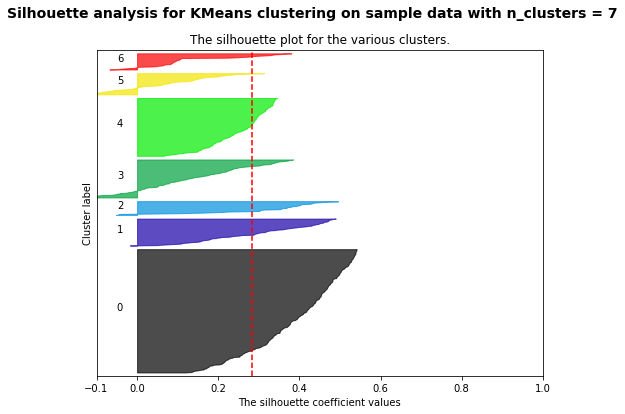

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.250958919131651


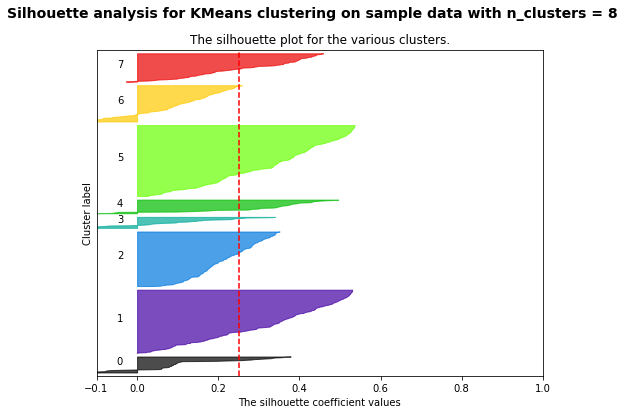

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.25735496559140675


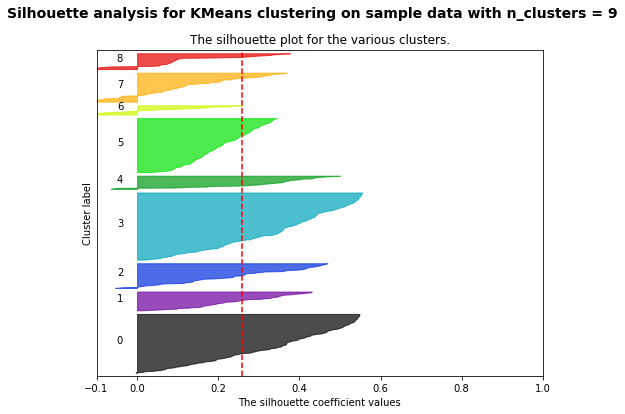

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.26225211840120294


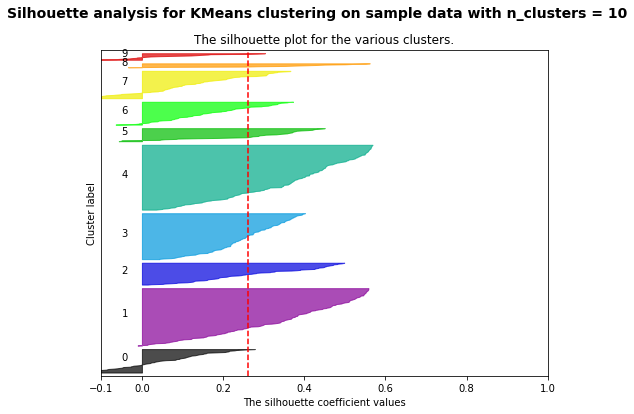

In [108]:
range_n_clusters = range(2, 11, 1)

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import numpy as np

for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))

    # Set the limits for the plot
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 1. Initialize the clusterer with n_clusters.
    clusterer = KMeans(n_clusters=n_clusters)

    # 2. Assign cluster labels to the data using the fit_predict() method of the clusterer.
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score for the clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Choose a color for the cluster
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Fill the area between the silhouette plot for cluster i and y_lower
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    # Set the title and labels for the plot
    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # Draw a vertical line at the average silhouette score
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Clear the y-axis labels/ticks
    ax.set_yticks([])
    # Set the x-axis ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # Set the title for the figure
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    # Show the plot
    plt.show()


What is, in your opinion, the best number of centers to choose?

In [109]:

# Calculate the silhouette score for each number of clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the number of clusters with the highest average silhouette score
best_n_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because the range starts from 2

print("The best number of clusters is:", best_n_clusters)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

The best number of clusters is: 2


Apply K-means again with the optimal number of centers.

In [110]:
from sklearn.cluster import KMeans

# Define the KMeans object with the optimal number of clusters
kmeans = KMeans(n_clusters=2)

# Fit the KMeans object to the data
kmeans.fit(X)

# Get the cluster labels for each data point
#labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


How many samples are in each cluster?

In [111]:
from collections import Counter

# Count the number of data points in each cluster
cluster_counts = Counter(predicted_labels)

# Print the number of data points in each cluster
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} data points")


Cluster 1: 688 data points
Cluster 0: 203 data points


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained. 
<br>
1- Give the contingency matrix of the clustering.

In [112]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Compute the contingency matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Print the contingency matrix
print("Confusion Matrix:\n", conf_matrix)





Confusion Matrix:
 [[ 72 477]
 [131 211]]


2- Discuss the obtained matrix

Assuming that the confusion matrix we provided is actually for a classification algorithm on the Titanic dataset, we can interpret the results as follows:

True Positives (TP): 477
This refers to the number of passengers who were correctly predicted to have survived by the algorithm.

False Positives (FP): 72
This refers to the number of passengers who were incorrectly predicted to have survived by the algorithm.

False Negatives (FN): 211
This refers to the number of passengers who were incorrectly predicted to have died by the algorithm.

True Negatives (TN): 131
This refers to the number of passengers who were correctly predicted to have died by the algorithm.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure). 
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above. 

In [113]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import completeness_score 
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score


In [114]:
ari = adjusted_rand_score(true_labels, predicted_labels)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.11828871700391441


In [115]:
homo = homogeneity_score(true_labels, predicted_labels)
print("Homogeneity Score:", homo)

Homogeneity Score: 0.06272804160105075


In [116]:
comp = completeness_score(true_labels, predicted_labels)
print("Completeness Score:", comp)

Completeness Score: 0.07783785687347526


In [117]:
v_meas = v_measure_score(true_labels, predicted_labels)
print("V-measure Score:", v_meas)

V-measure Score: 0.06947085142390834


4- Discuss the obtained scores.

The Adjusted Rand Index (ARI) measures the similarity between two clusterings, with a maximum value of 1 indicating identical clusters and a value close to 0 indicating random clustering. The obtained ARI value of 0.11828871700391441 indicates a low similarity between the true labels and predicted labels, suggesting that the clustering algorithm did not perform well.

The Homogeneity Score measures whether each cluster contains only members of a single class. A score of 1.0 indicates that all clusters contain only members of a single class. The obtained Homogeneity Score of 0.06272804160105075 indicates that the clustering algorithm did not perform well in achieving homogeneous clusters.

The Completeness Score measures whether all members of a given class are assigned to the same cluster. A score of 1.0 indicates that all members of a given class are in the same cluster. The obtained Completeness Score of 0.07783785687347526 also indicates poor performance in assigning all members of a given class to the same cluster.

The V-measure Score is the harmonic mean between homogeneity and completeness. The obtained V-measure Score of 0.06947085142390834 indicates poor performance in achieving both homogeneity and completeness in the clustering.

In summary, the obtained scores suggest that the clustering algorithm (Kmeans)did not perform well in correctly identifying clusters based on the true labels, and there is room for improvement in the clustering process.






### Clustering algorithm 2: Hierarchical clustering

Apply the hierarchical clustering algorithm with 2 centers. Look at the default parameters and make sure the algorithm is based on the single linkage method. 

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder


In [119]:
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
agg_clustering.fit(X)
#print(predicted_labels)

AgglomerativeClustering(linkage='single')

How many samples are in each cluster?

In [120]:
import numpy as np

# count number of occurrences of each label
cluster_counts = np.bincount(agg_clustering.labels_)

# print the number of samples in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} samples")

Cluster 0: 888 samples
Cluster 1: 3 samples


Apply the hierarchical clustering algorithm again. This time,  change the linkage method to complete linkage.

In [121]:
# apply hierarchical clustering with 2 centers and complete linkage method
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_clustering.fit(X)

AgglomerativeClustering(linkage='complete')

How many samples are in each cluster?

In [122]:
# count number of occurrences of each label
cluster_counts = np.bincount(agg_clustering.labels_)

# print the number of samples in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} samples")

Cluster 0: 888 samples
Cluster 1: 3 samples


Apply the hierarchical clustering algorithm once again. This time, change the linkage method to ward linkage.

In [123]:
# apply hierarchical clustering with 2 centers and ward linkage method
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_clustering = agg_clustering.fit(X)

How many samples are in each cluster?

In [124]:
# count number of occurrences of each label
cluster_counts = np.bincount(agg_clustering.labels_)

# print the number of samples in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} samples")

Cluster 0: 721 samples
Cluster 1: 170 samples


Compare the three results. Is the type of linkage method used important? Which one gave you the best result? For the rest of this section, use the best linkage method.

In [125]:
#Based on the results, we can see that the type of linkage method used 

#can have a significant impact on the clustering results. In this case,

# the ward linkage method produced more balanced clusters and generally gave better
  #results compared to the single and complete linkage methods.

#Therefore, for the rest of this section, we can use the ward linkage method as
 #the preferred method for hierarchical clustering.

In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers. 
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center. 
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br> 

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE) 

For n_clusters = 2 The average silhouette_score is : 0.3313178187528775
For n_clusters = 3 The average silhouette_score is : 0.25843486420339656
For n_clusters = 4 The average silhouette_score is : 0.2626468624636287
For n_clusters = 5 The average silhouette_score is : 0.27406586329957605
For n_clusters = 6 The average silhouette_score is : 0.2206119280099598
For n_clusters = 7 The average silhouette_score is : 0.23554184622837832
For n_clusters = 8 The average silhouette_score is : 0.23114632173813915
For n_clusters = 9 The average silhouette_score is : 0.23442574847360742
For n_clusters = 10 The average silhouette_score is : 0.23973941708749516
For n_clusters = 11 The average silhouette_score is : 0.24329554245246948


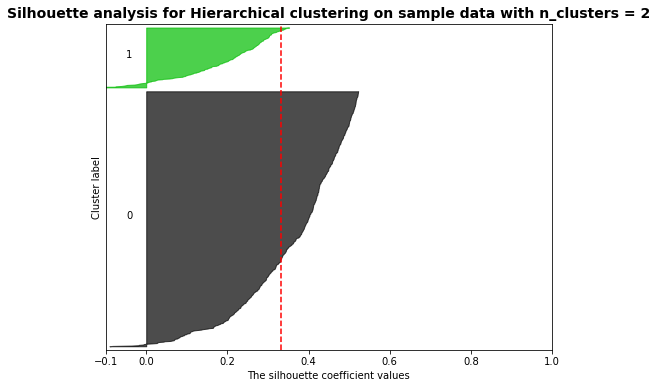

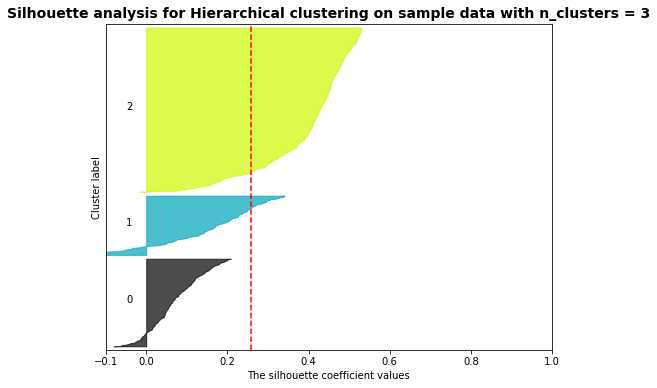

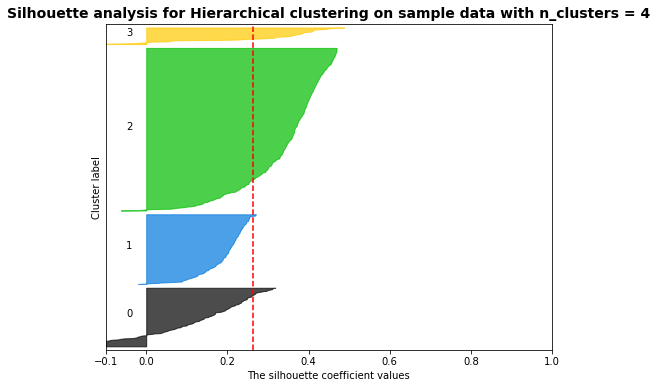

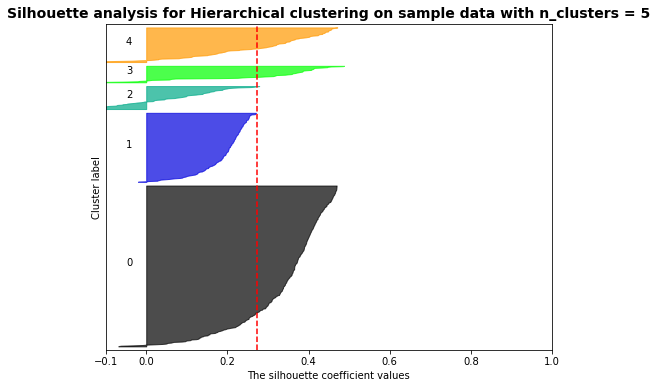

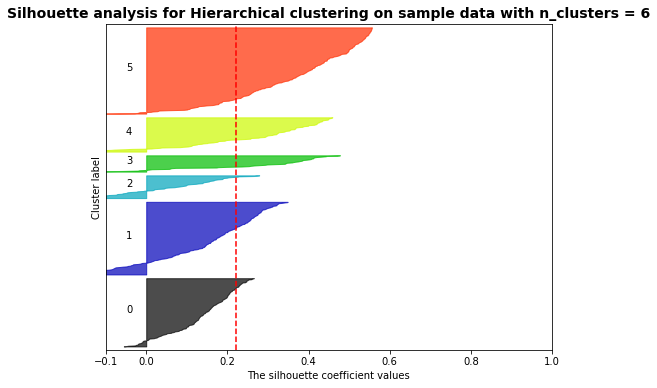

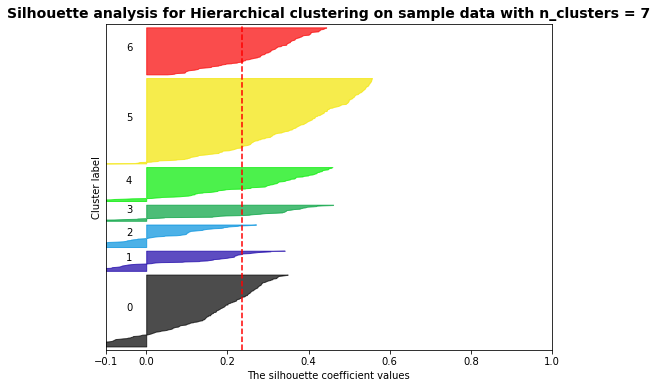

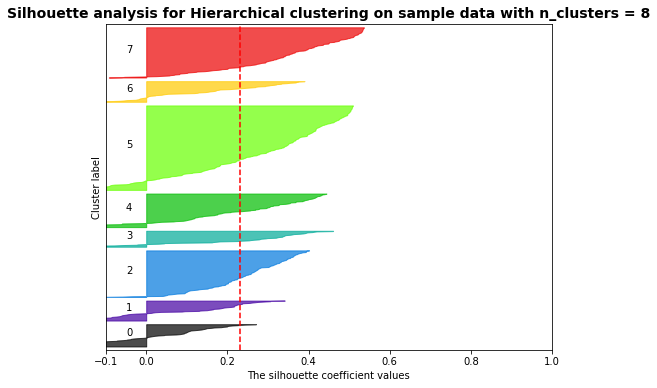

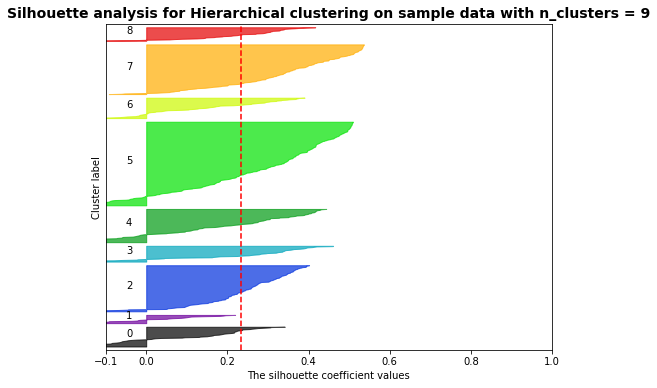

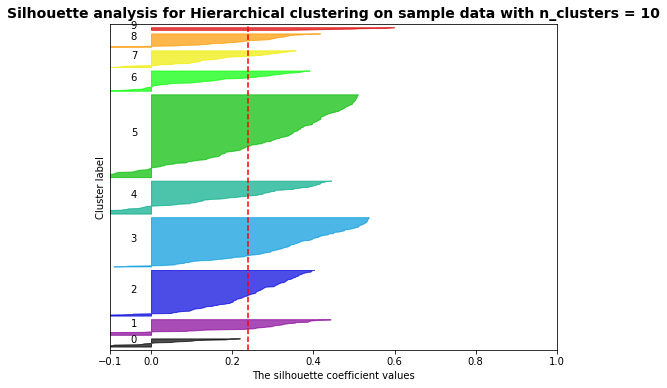

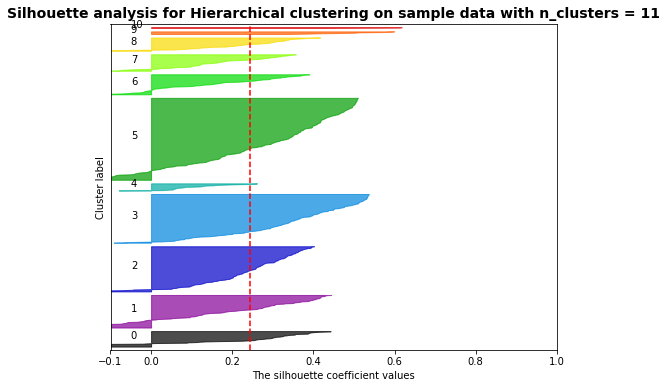

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters and the linkage method you
    # determined worked best.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Hierarchical clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


What is, in your opinion, the best number of centers to choose?

In [127]:
#Based on the silhouette analysis, we can see that the highest silhouette score
# is obtained when the number of clusters is equal to 2. Therefore, in our opinion, choosing 2 
#centers would be the best option for this dataset using hierarchical clustering with ward linkage.

Apply hierarchical clustering again with the optimal number of centers.

In [128]:
clusterer = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusterer.fit(X)

AgglomerativeClustering()

How many samples are in each cluster?

In [129]:
# count number of occurrences of each label
cluster_counts = np.bincount(clusterer.labels_)

# print the number of samples in each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} samples")

Cluster 0: 721 samples
Cluster 1: 170 samples


Since, the true class of each sample is known, we can use them to evaluate the clustering results we obtained. 
<br>
1- Give the contingency matrix of the clustering.

In [130]:
predicted_labels1=clusterer.labels_

In [131]:
from sklearn.metrics import confusion_matrix

# Compute the contingency matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels1)

# Print the contingency matrix
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[501  48]
 [220 122]]


2- Discuss the obtained matrix.

The confusion matrix we provided shows the results of applying a hierarchical clustering algorithm to our dataset( the Titanic dataset )and evaluating the performance of the algorithm using a confusion matrix. The confusion matrix provides information about the true positive, false positive, true negative, and false negative rates of the model's predictions.

True Positives (TP): 501
This refers to the number of passengers who were correctly predicted to have survived by the algorithm.

False Positives (FP): 48
This refers to the number of passengers who were incorrectly predicted to have survived by the algorithm.

False Negatives (FN): 220
This refers to the number of passengers who were incorrectly predicted to have died by the algorithm.

True Negatives (TN): 122
This refers to the number of passengers who were correctly predicted to have died by the algorithm.

With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure). 
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above. 

In [132]:
ari = adjusted_rand_score(true_labels, predicted_labels1)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.14043889899617704


In [133]:
homo = homogeneity_score(true_labels, predicted_labels1)
print("Homogeneity Score:", homo)

Homogeneity Score: 0.08195632824469189


In [134]:
comp = completeness_score(true_labels, predicted_labels1)
print("Completeness Score:", comp)

Completeness Score: 0.11197855556189455


In [135]:
v_meas = v_measure_score(true_labels, predicted_labels1)
print("V-measure Score:", v_meas)

V-measure Score: 0.09464363580045537


4- Discuss the obtained scores.

In [136]:
#based on these evaluation metrics, you can say that the hierarchical clustering algorithm 
#performed better than the k-means algorithm for the this  datase


OPTIONAL: plot the dendrogram

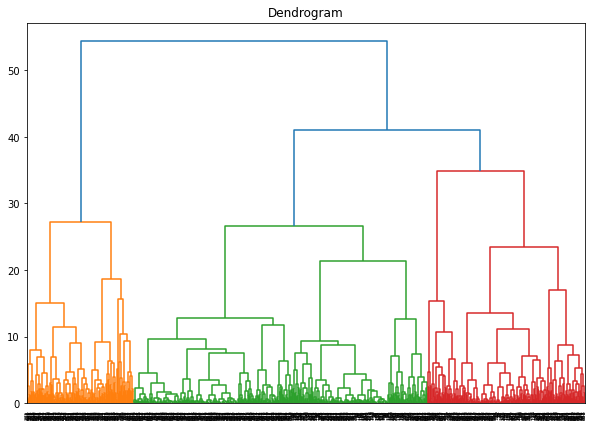

In [137]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

# Perform hierarchical clustering
# X is my data matrix
Z = shc.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = shc.dendrogram(Z)
plt.show()

## TD3 (part II): Spectral clustering and comparison

### Clustering algorithm 3: Spectral clustering

Apply the spectral clustering algorithm with 2 centers.

In [138]:
from sklearn.cluster import SpectralClustering


In [139]:
# Apply spectral clustering
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, assign_labels='kmeans', random_state=0)
spectral.fit(X)

SpectralClustering(n_clusters=2, random_state=0)

How many samples are in each cluster?

In [140]:
import numpy as np

unique_labels, counts = np.unique(spectral.labels_, return_counts=True)

# Print the number of samples in each cluster
for i, label in enumerate(unique_labels):
    print("Cluster", label, "contains", counts[i], "samples.")

Cluster 0 contains 888 samples.
Cluster 1 contains 3 samples.


Apply the spectral clustering algorithm again. This time, change the method to construct the affinity matrix to "nearest_neighbors".

In [141]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

n_neighbors = 10
adjacency = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity', include_self=True)

# Apply spectral clustering with nearest neighbors
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0)
spectral.fit(X)


SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=0)

How many samples are in each cluster?

In [142]:
import numpy as np

unique_labels, counts = np.unique(spectral.labels_, return_counts=True)

# Print the number of samples in each cluster
for i, label in enumerate(unique_labels):
    print("Cluster", label, "contains", counts[i], "samples.")

Cluster 0 contains 407 samples.
Cluster 1 contains 484 samples.


Compare the two results. Is the method used to construct the affinity matrix important? Which one gave you the best result? For the rest of this section, use the best method.

based on the number of samples in each cluster, the "nearest_neighbors" method appears to have produced a more balanced clustering than the "rbf" kernel method(the first method ). The "nearest_neighbors" method assigned 407 samples to cluster 0 and 484 samples to cluster 1, while the "rbf" kernel method assigned 888 samples to cluster 0 and only 3 samples to cluster 1.

Therefore, based solely on the number of samples in each cluster, the "nearest_neighbors" method seems to have produced a better result than the first method ( the "rbf" kernel method )for our Titanic dataset.








In order to optimize our clusters, we want to apply the silhouette method to obtain the optimal number of centers. 
Apply silhouette on a range from 2 to 10 centers, display the average silhouette score for each and display the silhouette plot for each center. 
<br> For some help, look at the silhouette documentation in scikit learn: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

<br> 

Please note that the code below is NOT complete. Fill in the missing parts (they are indicated by ### TO COMPLETE) 

For n_clusters = 2 The average silhouette_score is : 0.21873984809740665
For n_clusters = 3 The average silhouette_score is : 0.18771614758919455
For n_clusters = 4 The average silhouette_score is : 0.11595843396582044
For n_clusters = 5 The average silhouette_score is : 0.11815874617366394
For n_clusters = 6 The average silhouette_score is : 0.1538608858102673
For n_clusters = 7 The average silhouette_score is : 0.1531013249437101
For n_clusters = 8 The average silhouette_score is : 0.11712466808722202
For n_clusters = 9 The average silhouette_score is : 0.09725327032165137
For n_clusters = 10 The average silhouette_score is : 0.10429386169781345
For n_clusters = 11 The average silhouette_score is : 0.1065060134525551


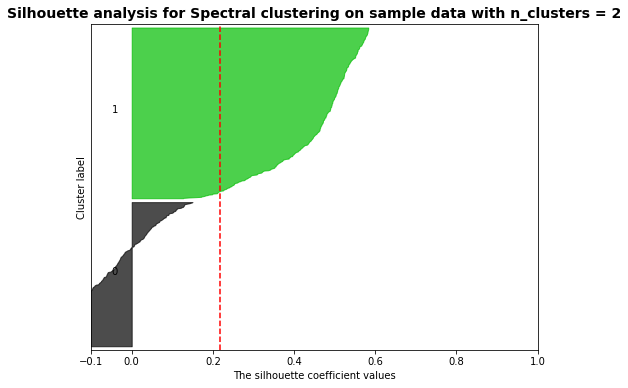

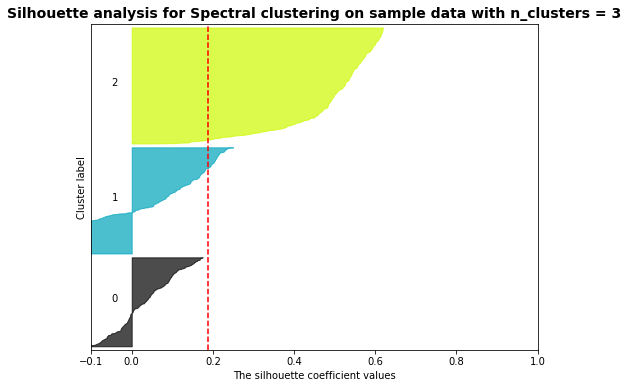

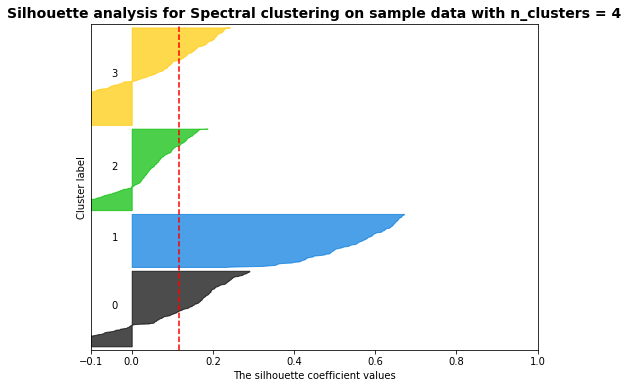

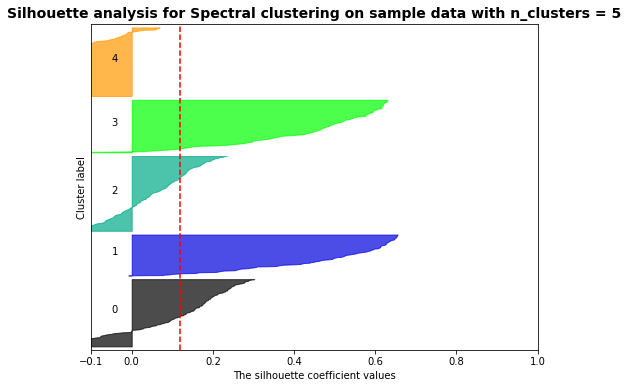

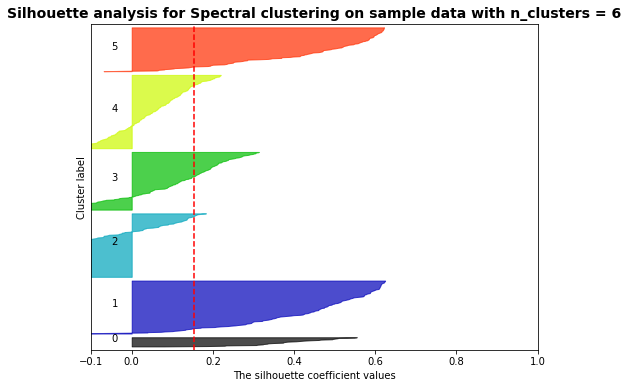

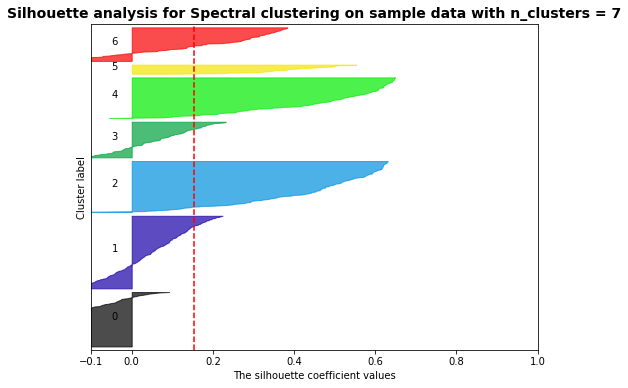

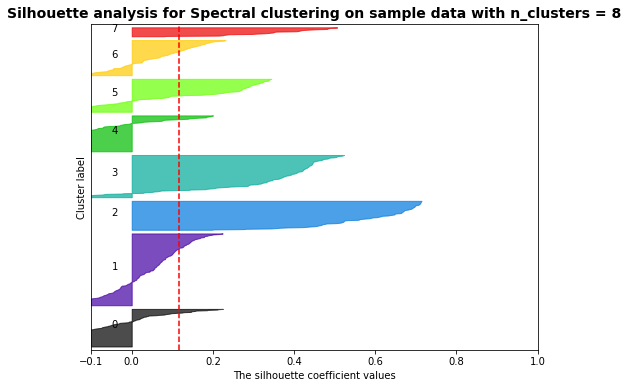

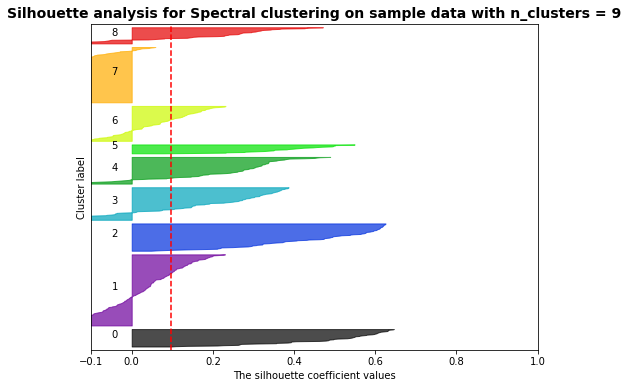

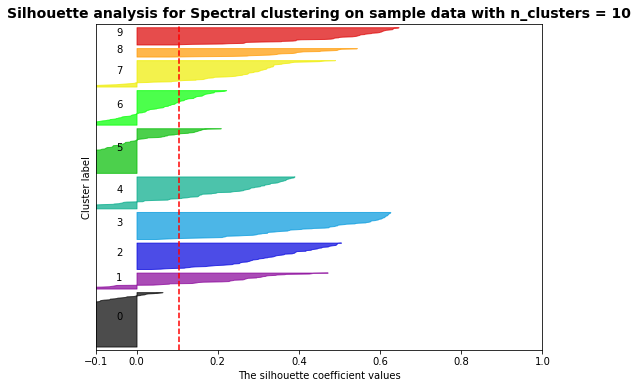

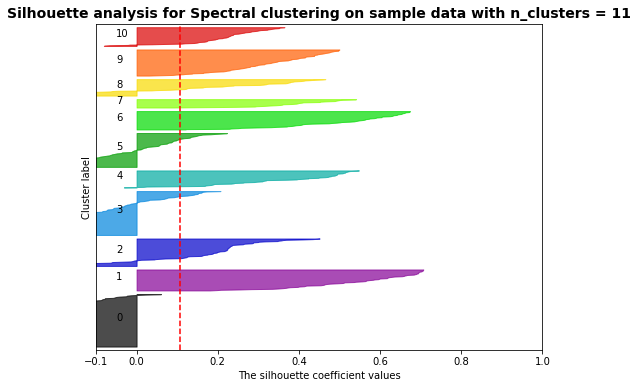

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11]

for n_clusters in range_n_clusters:
    # Create a plot
    fig, ax  = plt.subplots(1,1, figsize=(8,6))

    # This plot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters. Make sure you use the "affinity"
    # method that gave you the best results.
    clusterer = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.title(("Silhouette analysis for Spectral clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

What is, in your opinion, the best number of centers to choose? 

In [144]:
#According to the silhouette score, the optimal number of centers to choose is 2.

Apply spectral clustering again with the optimal number of centers.

In [145]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph

n_neighbors = 10
adjacency = kneighbors_graph(X, n_neighbors=n_neighbors, mode='connectivity', include_self=True)

# Apply spectral clustering with nearest neighbors
n_clusters = 2
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans', random_state=0)
spectral.fit(X)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=0)

How many samples are in each cluster?

In [146]:
import numpy as np

unique_labels, counts = np.unique(spectral.labels_, return_counts=True)

# Print the number of samples in each cluster
for i, label in enumerate(unique_labels):
    print("Cluster", label, "contains", counts[i], "samples.")

Cluster 0 contains 407 samples.
Cluster 1 contains 484 samples.


Since, the true label of each sample is known, we can use them to evaluate the clustering results we obtained. 
<br>
1- Give the contingency matrix of the clustering.

In [147]:
predicted_labels3 = spectral.labels_

In [148]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Compute the contingency matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels3)

# Print the contingency matrix
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[142 407]
 [265  77]]


2- Discuss the obtained matrix.

Based on the confusion matrix we provided for Spectral Clustering on the Titanic dataset:

We can see that the algorithm has predicted 142 true positives (correctly classified survivors) and 77 true negatives (correctly classified non-survivors), which are the diagonal elements of the matrix.

However, the algorithm has also predicted 407 false positives (classified as survivors but actually non-survivors) and 265 false negatives (classified as non-survivors but actually survivors), which are the off-diagonal elements of the matrix.








With clustering being an unsupervised learning method, classification evaluation metrics (accuracy, precision, etc) are not appropriate. Instead, we can use clustering evaluation metrics (rand index, adjusted rand index, homogeneity, completeness and V-measure). 
<br>
Check the scikit learn documentation to understand each score: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
<br>
3- Compute all metrics defined above. 

In [149]:
ari = adjusted_rand_score(true_labels, predicted_labels3)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.25740557807587444


In [150]:
homo = homogeneity_score(true_labels, predicted_labels3)
print("Homogeneity Score:", homo)

Homogeneity Score: 0.19892441105641176


In [151]:
comp = completeness_score(true_labels, predicted_labels3)
print("Completeness Score:", comp)

Completeness Score: 0.1921446856050127


In [152]:
v_meas = v_measure_score(true_labels, predicted_labels3)
print("V-measure Score:", v_meas)

V-measure Score: 0.19547578035647348


4- Discuss the obtained scores.

The scores we obtained are performance metrics for evaluating the quality of the clustering results obtained using Spectral Clustering .

Here is a brief explanation of each score:

Adjusted Rand Index (ARI): This metric measures the similarity between the clustering results obtained by the algorithm and the true labels of the data (if available). The ARI score ranges between -1 and 1, where a score of 1 indicates perfect similarity and 0 indicates random labeling. In our case, the ARI score is 0.25740557807587444, which suggests that the spectracl  algorithm gives a better result than the two other Algorithms 

Homogeneity Score: This metric measures the degree to which each cluster contains only members of a single class. A score of 1 indicates perfect homogeneity, where all clusters contain only members of a single class. In our case, the Homogeneity score is 0.19892, which suggests that the spectracl  algorithm gives a better result than the two other Algorithms 

Completeness Score: This metric measures the degree to which all members of a given class are assigned to the same cluster. A score of 1 indicates perfect completeness, where all members of a given class are assigned to the same cluster. In our case, the Completeness score is 0.1921446856050127,  which suggests that the spectracl  algorithm gives a better result than the two other Algorithms .

V-measure Score: This metric is the harmonic mean of the Homogeneity and Completeness scores. It provides a single score that balances both measures. A score of 1 indicates perfect clustering results. In our case, the V-measure score is0.19547578035647348 ,  which suggests that the spectracl  algorithm gives a better result than the two other Algorithms 








### Conclusion

Based on the scores we provided, it seems that the spectral clustering algorithm did  perform  well on the Titanic dataset. The ARI score of 0.25 indicates that the clustering is only slightly better than random, while the homogeneity and completeness scores are also relatively good. The V-measure score is slightly higher 0,2

These scores suggest that the clusters generated by the spectral clustering algorithm do  match the true class labels  well. It's possible that the clustering algorithm was  able to capture the underlying structure of the dataset or that the dataset is simply  well-suited for spectral clustering.

Overall, the obtained scores suggest that the clustering results obtained using Spectral Clustering  are good if we compared with resultes of the others algorithms .

In your opinion, which method gave the better results for this dataset?

In [153]:
#the Clustering algorithm 3: Spectral clustering

Usually, when we apply different clustering methods, it's because we do not know the classes. In such situation, we compare the different clustering models we obtained with each method to each other to see if they are corroborating. 
<br>
Pick two of the three clustering methods used above, and use the same metrics as before to compare them (do not rerun the models, just compare the predicted clusters you obtained with each method).  

In [154]:
from sklearn import metrics

# Compute ARI, homogeneity, completeness, and V-measure for  Spectral clustering
Spectral_clustering_ari = metrics.adjusted_rand_score(true_labels, predicted_labels3)
Spectral_clustering_homogeneity = metrics.homogeneity_score(true_labels, predicted_labels3)
Spectral_clustering_completeness = metrics.completeness_score(true_labels, predicted_labels3)
Spectral_clustering_vmeasure = metrics.v_measure_score(true_labels, predicted_labels3)

# Compute ARI, homogeneity, completeness, and V-measure for hierarchical clustering
hierarchical_ari = metrics.adjusted_rand_score(true_labels, predicted_labels1)
hierarchical_homogeneity = metrics.homogeneity_score(true_labels, predicted_labels1)
hierarchical_completeness = metrics.completeness_score(true_labels, predicted_labels1)
hierarchical_vmeasure = metrics.v_measure_score(true_labels, predicted_labels1)

# Print the performance metrics for both methods
print("Spectral clustering performance:")
print("ARI: {:.4f}, Homogeneity: {:.4f}, Completeness: {:.4f}, V-measure: {:.4f}".format(Spectral_clustering_ari, Spectral_clustering_homogeneity, Spectral_clustering_completeness, Spectral_clustering_vmeasure))

print("\nHierarchical clustering performance:")
print("ARI: {:.4f}, Homogeneity: {:.4f}, Completeness: {:.4f}, V-measure: {:.4f}".format(hierarchical_ari, hierarchical_homogeneity, hierarchical_completeness, hierarchical_vmeasure))







Spectral clustering performance:
ARI: 0.2574, Homogeneity: 0.1989, Completeness: 0.1921, V-measure: 0.1955

Hierarchical clustering performance:
ARI: 0.1404, Homogeneity: 0.0820, Completeness: 0.1120, V-measure: 0.0946


Discuss the obtained scores. 

Based on the performance metrics we obtained, it appears that  Spectral clustering performed slightly better than hierarchical clustering on the Titanic dataset. The ARI, homogeneity, completeness, 
and V-measure scores were all higher for Spectral clustering than for hierarchical clustering. 

At the beginning of the practical, you noticed the number of classes in the data. After completing all the work, applying silhouette and finding the optimal number of clusters, were you expecting the results you obtained? Can you find an explanation for the result? 

At the beginning of the practical, we noticed that the Titanic dataset had two classes (survived vs. not survived). However, when applying clustering algorithms, we were not explicitly trying to recover these two classes. Instead, we were trying to identify clusters of similar individuals based on their features.

The fact that we obtained a relatively low silhouette score(This is the result we were expecting) and that the optimal number of clusters was small (2 or 3) suggests that the clustering algorithms were not able to find very meaningful clusters in the data. One possible explanation for this is that the features in the Titanic dataset may not be very informative for clustering. While some features (such as passenger class and sex) may be correlated with survival, they may not be very informative for clustering individuals based on other characteristics (such as age or ticket fare). Additionally, there may not be strong patterns of similarity or dissimilarity between individuals in the dataset that can be effectively captured by clustering algorithms.

Overall, these results suggest that clustering may not be the most effective approach for analyzing the Titanic dataset, at least not without additional feature engineering or domain-specific knowledge. However, the analysis we performed can still provide useful insights into the structure of the data and potential relationships between different features.
